# Overriding Default Grouping with the `group` Aesthetic

#### How Grouping Works in Lets-Plot

Default Grouping Behavior:
- Lets-Plot automatically groups data by discrete variables mapped to aesthetics like `color, shape, linetype`, etc.
- This creates separate visual elements (`lines, paths, polygons`) for each unique combination of these variables

Explicit Group Control:
- Use `group = 'var'` to group only by that specific variable, overriding default grouping
- Use `group = [var1, var2, ...]` to group by the interaction of multiple variables
- Use `group = []` to disable all grouping completely


In [1]:
from lets_plot import *
import polars as pl


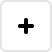
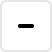
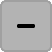
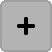
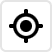
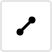
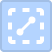
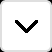
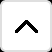
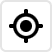
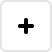
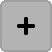
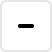
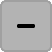
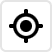
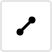
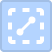
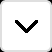
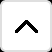
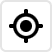

In [2]:
LetsPlot.setup_html()

In [3]:
mtcars = pl.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
mtcars.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
i64,str,str,f64,i64,i64,str,str,i64,i64,str,str
1,"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
2,"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
3,"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
4,"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
5,"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


#### 1. Highway MPG by Drive Type


In [4]:
seed = 21
( ggplot(mtcars, aes(x='drv', y='hwy')) 
  + geom_violin(tooltips='none') 
  + geom_sina(seed=seed)
)

#### 2. Add More Information - `color`

In [5]:
( ggplot(mtcars, aes(x='drv', y='hwy')) 
  + geom_violin(tooltips='none') 
  + geom_sina(aes(color='cyl'), seed=seed)
)

#### 3. Discrete `color`: Default Grouping Creates Unwanted Separation

Let's add discrete colors by marking the `cyl` variable as discrete. 

When we map `color=as_discrete('cyl')`, Lets-Plot automatically groups the data by the discrete color variable. \
This means:

* Automatic grouping: Each combination of `drv` (x-axis) and `cyl` (color) becomes a separate group
* Position adjustment: The `geom_sina()` uses "dodge" positioning by default, which separates overlapping groups horizontally
* Result: Instead of one sina plot per drive type, we get 4 separate sina plots (one for each cylinder count) within each drive type category


In [6]:
( ggplot(mtcars, aes(x='drv', y='hwy')) 
  + geom_violin(tooltips='none') 
  + geom_sina(aes(color=as_discrete('cyl')), seed=seed)
)

#### 4. Fix with Explicit Grouping by Drive Type

In [7]:
( ggplot(mtcars, aes(x='drv', y='hwy')) 
  + geom_violin(tooltips='none') 
  + geom_sina(aes(color=as_discrete('cyl'),
                  group='drv' # <-- group only by drive type (ignoring the color variable for grouping)
  ), seed=seed)
)

#### 5. Cleaner Fix: Disable All Grouping

In [8]:
( ggplot(mtcars, aes(x='drv', y='hwy')) 
  + geom_violin(tooltips='none') 
  + geom_sina(aes(color=as_discrete('cyl'),
                  group=[]  # <-- disable all grouping entirely
  ), seed=seed)
)